In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from imblearn.over_sampling import SMOTE
import joblib


from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import matthews_corrcoef, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
pd.set_option('max_columns', None)

In [3]:
data = pd.read_csv(r"C:\Users\Abraham Audu\Documents\Py-Self-Learn\credit_card_default_prediction\data\UCI_Credit_Card.csv")

In [4]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

### Visualization

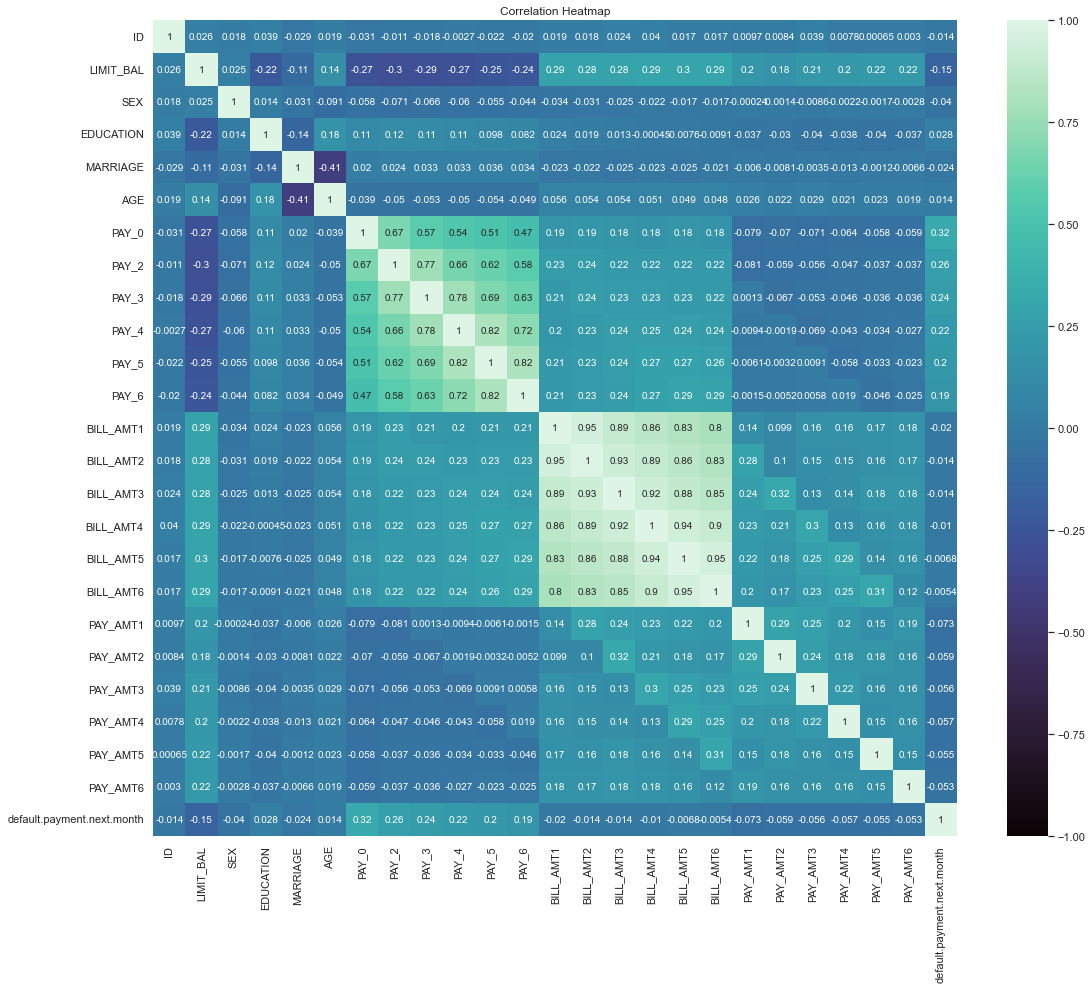

In [7]:
corr = data.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, vmin = -1.0, cmap = 'mako')
plt.title('Correlation Heatmap')
plt.show()

### Preprocessing


In [8]:
# legacy code

def onehot_encode(df, column_dict):
    df = df.copy()
    
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis = 1)
        df = df.drop(column, axis = 1)
    return df

In [9]:
# Legacy code

def preprocess_input(df):
    df = df.copy()
    
    # Drop ID
    df = df.drop('ID', axis = 1)
    
    # Perform one-hot encoding
    df = onehot_encode(
        df,
        {
            'EDUCATION': 'EDU',
            'MARRIAGE': 'MAR'
        })
    
    # split df into x,y
    y = df['default.payment.next.month'].copy()
    X = df.drop('default.payment.next.month', axis = 1).copy()
    
    # Scale X with a standard scaler
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    
    return X, y
    

In [9]:
X, y = preprocess_input(data)

In [10]:
X

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,-1.136720,0.810161,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
1,-0.365981,0.810161,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
2,-0.597202,0.810161,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
3,-0.905498,0.810161,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
4,-0.905498,-1.234323,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,-1.234323,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,-0.021608,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
29996,-0.134759,-1.234323,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,0.253137,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,-0.021608,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
29997,-1.059646,-1.234323,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,0.253137,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
29998,-0.674276,-1.234323,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,-0.616452,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,-0.021608,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326


In [23]:
y.value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [12]:
{column: len(X[column].unique()) for column in X.columns}

{'LIMIT_BAL': 81,
 'SEX': 2,
 'AGE': 56,
 'PAY_0': 11,
 'PAY_2': 11,
 'PAY_3': 11,
 'PAY_4': 11,
 'PAY_5': 10,
 'PAY_6': 10,
 'BILL_AMT1': 22723,
 'BILL_AMT2': 22346,
 'BILL_AMT3': 22026,
 'BILL_AMT4': 21548,
 'BILL_AMT5': 21010,
 'BILL_AMT6': 20604,
 'PAY_AMT1': 7943,
 'PAY_AMT2': 7899,
 'PAY_AMT3': 7518,
 'PAY_AMT4': 6937,
 'PAY_AMT5': 6897,
 'PAY_AMT6': 6939,
 'EDUCATION_0': 2,
 'EDUCATION_1': 2,
 'EDUCATION_2': 2,
 'EDUCATION_3': 2,
 'EDUCATION_4': 2,
 'EDUCATION_5': 2,
 'EDUCATION_6': 2,
 'MARRIAGE_0': 2,
 'MARRIAGE_1': 2,
 'MARRIAGE_2': 2,
 'MARRIAGE_3': 2}

### Over-sampling/Under-sampling

In [6]:
def class_count(df):
    data_default = df[df['default.payment.next.month'] == 1]
    data_non_default = df[df['default.payment.next.month'] == 0]
    default_frac = len(data_default)/len(data_non_default)

    print ("non_default:", len(data_non_default), "\ndefault:", len(data_default), "\ndefault_fraction:", default_frac)
    
def class_split(df):
    data_default = df[df['default.payment.next.month'] == 1]
    data_non_default = df[df['default.payment.next.month'] == 0]

    return data_default, data_non_default

In [7]:
class_count(data)

non_default: 23364 
default: 6636 
default_fraction: 0.2840267077555213


#### Split the data before manipulating training data

In [9]:
train_data = data.sample(frac = 0.7, random_state = 234)
test_data = data.drop(train_data.index)

In [10]:
class_count(train_data)

non_default: 16371 
default: 4629 
default_fraction: 0.2827560930914422


In [11]:
class_count(test_data)

non_default: 6993 
default: 2007 
default_fraction: 0.287001287001287


### under-sample train data

In [12]:
class_1, class_0 = class_split(train_data)

In [13]:
len(class_1)

4629

In [14]:
len(class_0)

16371

In [15]:
class_0_under = class_0.sample(len(class_1))
class_0_under

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
16623,16624,80000.0,1,1,2,31,0,0,0,0,0,0,72840.0,74631.0,77329.0,78147.0,79785.0,76766.0,9000.0,5000.0,3000.0,3000.0,2501.0,3000.0,0
8213,8214,90000.0,1,2,1,58,0,0,0,0,0,0,85818.0,88988.0,50780.0,50929.0,48735.0,49746.0,5100.0,2200.0,2200.0,1944.0,2200.0,2000.0,0
15576,15577,350000.0,1,1,1,49,-2,-2,-2,-2,-2,-2,27506.0,4213.0,1518.0,4625.0,363.0,858.0,4213.0,1529.0,4713.0,363.0,858.0,566.0,0
26338,26339,200000.0,2,2,2,27,0,0,0,-1,-1,0,7886.0,7101.0,5378.0,5501.0,9402.0,9221.0,4500.0,3378.0,5501.0,9402.0,6000.0,5683.0,0
18761,18762,240000.0,2,2,2,29,0,0,0,0,0,0,66473.0,46296.0,36751.0,35625.0,33114.0,35473.0,8000.0,2002.0,1600.0,2000.0,3000.0,10000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,2955,50000.0,1,2,2,24,0,0,-2,-2,-2,-2,34500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3773,3774,140000.0,2,1,1,66,1,-2,-2,-2,-1,2,0.0,0.0,0.0,0.0,825.0,675.0,0.0,0.0,0.0,825.0,0.0,23715.0,0
14633,14634,50000.0,1,2,2,25,1,4,3,2,2,0,53086.0,51981.0,50805.0,51518.0,50713.0,51309.0,0.0,0.0,1800.0,108.0,2400.0,1926.0,0
22242,22243,150000.0,2,2,2,31,-1,-1,-1,-1,0,-1,13701.0,12009.0,11985.0,24310.0,17280.0,36986.0,12013.0,12005.0,24322.0,6000.0,37000.0,25017.0,0


In [16]:
len(class_0_under)

4629

In [17]:
df_train_under = pd.concat([class_0_under, class_1], axis = 0)
df_train_under = df_train_under.sample(frac=1)
class_count(df_train_under)

non_default: 4629 
default: 4629 
default_fraction: 1.0


#### Over-sample train data

In [18]:
class_count(train_data)

non_default: 16371 
default: 4629 
default_fraction: 0.2827560930914422


In [19]:
data_1, data_0 = class_split(train_data)

In [20]:
len(data_1)

4629

In [21]:
len(data_0)

16371

In [22]:
data_1_over = data_1.sample(len(data_0), replace = True)

In [23]:
len(data_1_over)

16371

In [24]:
df_train_over = pd.concat([data_1_over, data_0], axis = 0)
df_train_over = df_train_over.sample(frac=1)
class_count(df_train_over)

non_default: 16371 
default: 16371 
default_fraction: 1.0


#### SMOTE training data

In [25]:
smote_x = train_data.drop('default.payment.next.month', axis=1)
smote_y = train_data['default.payment.next.month']

In [26]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(smote_x, smote_y)

In [27]:
df_train_smote_over = pd.concat([X_sm, y_sm], axis='columns')
class_count(df_train_smote_over)

non_default: 16371 
default: 16371 
default_fraction: 1.0


In [28]:
from pandas import DataFrame

def preprocess_input(df: DataFrame):
    """
    Takes raw dataset in Pandas dataframe format as input and returns preprocessed features and expected outcomes
    as X and y respectively.

    - The ID column is dropped for simplicity
    - 'EDUCATION' and 'MARRIAGE' columns are one-hot encoded and the encoder is saved.
    - The dataset is split into X and y
    - The X dataset is scaled using StandardScaler and the scaler object is saved
    - X and y dataframes are returned
    Args:
        df: Dataset dataframe

    Returns:
        X (DataFrame): DataFrame
        y (DataFrame): DataFrame
    """
    df = df.copy()

    # Drop ID
    df = df.drop('ID', axis=1)

    # Perform one-hot encoding
    categorical_cols = ['EDUCATION', 'MARRIAGE']

    onehotencoder = OneHotEncoder(sparse=False)

    transformed_data = onehotencoder.fit_transform(df[categorical_cols])
    joblib_file = f"encoder.pkl"
    joblib.dump(onehotencoder, joblib_file)
#     logger.info("Encoder saved successfully")
    # the above transformed_data is an array so convert it to dataframe
    encoded_data = pd.DataFrame(transformed_data, index=df.index, columns=onehotencoder.get_feature_names_out())

    # now concatenate the original data and the encoded data using pandas
    concatenated_data = pd.concat([df, encoded_data], axis=1)
    df = concatenated_data.drop(columns=categorical_cols)

    # split df into x,y
    y: DataFrame = df['default.payment.next.month'].copy()
    X = df.drop('default.payment.next.month', axis=1).copy()

    # Scale X with a standard scaler
    scaler = StandardScaler()
    X: DataFrame = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    joblib_file = f"scaler.pkl"
    joblib.dump(scaler, joblib_file)
#     logger.info("Scaler saved successfully")

    return X, y

In [29]:
def preprocess_test_input(df: DataFrame):
    """
    Takes raw single user credit card data in Pandas dataframe format as input and returns preprocessed features as X.

    - The ID column is dropped for simplicity
    - 'EDUCATION' and 'MARRIAGE' columns are one-hot encoded using previously saved encoder
    - The dataset is scaled using previously saved scaler
    - Preprocessed dataframe is returned
    Args:
        df (DataFrame): Single user credit card data

    Returns:
        df (DataFrame): Preprocessed data
    """
    df = df.copy()

    # Drop ID
    df = df.drop('ID', axis=1)

    # Perform one-hot encoding
    categorical_cols = ['EDUCATION', 'MARRIAGE']

    onehotencoder = joblib.load('encoder.pkl')

    transformed_data = onehotencoder.transform(df[categorical_cols])

    # the above transformed_data is an array so convert it to dataframe
    encoded_data = pd.DataFrame(transformed_data, index=df.index, columns=onehotencoder.get_feature_names_out())

    # now concatenate the original data and the encoded data using pandas
    concatenated_data = pd.concat([df, encoded_data], axis=1)
    df = concatenated_data.drop(columns=categorical_cols)

    # split df into x,y
    y: DataFrame = df['default.payment.next.month'].copy()
    X = df.drop('default.payment.next.month', axis=1).copy()
    
    # Scale X with a standard scaler
    scaler = joblib.load(f"scaler.pkl")
    df: DataFrame = pd.DataFrame(scaler.transform(X), columns=X.columns)
#     logger.info("Web user data processed successfully")

    return X, y

In [30]:
def train_test_preprocess(train_df, test_df):
    X_train, y_train = preprocess_input(train_df)
    
    X_test, y_test = preprocess_test_input(test_df)
    
    return X_train, y_train, X_test, y_test

#### preprocess the new data (custom split)

In [97]:
X_train, y_train, X_test, y_test = train_test_preprocess(train_data, test_data)

#### preprocess the data (sklearn split)

In [31]:
X, y = preprocess_input(data)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 123)

### Hyperparameter tuning

In [32]:
model_params = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': list(range(1,60,10)),
            'solver': ['liblinear', 'newton-cg']
        }
    },
    
    'C-Support Vector Classification': {
        'model': SVC(),
        'params': {
            'C': list(range(1,60,10)),
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma': ['scale', 'auto']
        }
    },
    
    'Neural Network (Multi-layer Perceptron classifier)': {
        'model': MLPClassifier(),
        'params': {
            'hidden_layer_sizes': list(range(100,450,50)),
            'activation': ['identity', 'logistic', 'tanh', 'relu'],
            'solver': ['lbfgs', 'sgd', 'adam'],
            'max_iter': list(range(200,650,50))
        }
    },
    
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'max_features': ["sqrt", "log2", None]
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    run = GridSearchCV(mp['model'], mp['params'], return_train_score=False, n_jobs=-1, scoring = 'f1', verbose = 1)
    run.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': run.best_score_,
        'best_params': run.best_params_
    })

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


### Training

In [98]:
models = {
    LogisticRegression(): 'Logistic Regression',
    SVC(): 'C-Support Vector Classification',
    MLPClassifier(): 'Neural Network (Multi-layer Perceptron classifier)',
    RandomForestClassifier(): 'Random Forest'
    }

for model in models.keys():
    model.fit(X_train, y_train)

C:\Users\Abraham Audu\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


### Testing

In [99]:
for model, name in models.items():
    y_true = y_test.copy()
    y_pred = model.predict(X_test)
    
    accuracy = model.score(X_test, y_test)
    MCC = matthews_corrcoef(y_true, y_pred)
    F1_SCORE = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
    
    print(f"{name}: \naccuracy --> {accuracy} \nMCC --> {MCC} \nf1_score --> {F1_SCORE}\n")

Logistic Regression: 
accuracy --> 0.7766666666666666 
MCC --> -0.009782586331446628 
f1_score --> 0.0

C-Support Vector Classification: 
accuracy --> 0.777 
MCC --> 0.0 
f1_score --> 0.0

Neural Network (Multi-layer Perceptron classifier): 
accuracy --> 0.7348888888888889 
MCC --> 0.08013576425195747 
f1_score --> 0.21409749670619235

Random Forest: 
accuracy --> 0.7777777777777778 
MCC --> 0.2732721041984683 
f1_score --> 0.3909866017052375



# Experiments

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDU_0', 'EDU_1', 'EDU_2', 'EDU_3',
       'EDU_4', 'EDU_5', 'EDU_6', 'MAR_0', 'MAR_1', 'MAR_2', 'MAR_3'],
      dtype='object')

In [17]:
sample_user = data.loc[data['ID']==2]
sample_user = sample_user.drop('default.payment.next.month', axis=1)
sample_user.to_csv("sample_user_data.csv", index=False)
#sample_user = sample_user.to_dict()
sample_user

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0


In [65]:
models_dict = {
    LogisticRegression(): 'Logistic Regression',
    SVC(): 'Support Vector Machine',
    MLPClassifier(): 'Neural Network'
}

In [68]:
a = models_dict.keys()
print(a)

TypeError: 'dict_keys' object is not subscriptable

In [59]:
sud = pd.read_csv('sample_user_data.csv')

sud

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0


In [21]:
import joblib
model = joblib.load('RandomForestClassifier().pkl')

def preprocess_website_input(df):
    df = df.copy()

    # Drop ID
    df = df.drop('ID', axis=1)

    # Perform one-hot encoding
    df = onehot_encode(
        df,
        {
            'EDUCATION': 'EDU',
            'MARRIAGE': 'MAR'
        })

    # Scale X with a standard scaler
    scaler = StandardScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    return df
new = preprocess_website_input(sud)
new
#result = model.predict(preprocess_website_input(sud))

C:\Users\Abraham Audu\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\Abraham Audu\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\Abraham Audu\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from v

C:\Users\Abraham Audu\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\Abraham Audu\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\Abraham Audu\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from v

C:\Users\Abraham Audu\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\Abraham Audu\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\Abraham Audu\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from v

C:\Users\Abraham Audu\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\Abraham Audu\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\Abraham Audu\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from v

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDU_2,MAR_2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
sud.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
3,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0


In [8]:

# onehotencoder = OneHotEncoder()

# categorical_cols = ['EDUCATION', 'MARRIAGE']

# transformed_data = onehotencoder.fit_transform(data[categorical_cols])

# # the above transformed_data is an array so convert it to dataframe
# encoded_data = pd.DataFrame(transformed_data, index=data.index)

# # now concatenate the original data and the encoded data using pandas
# concatenated_data = pd.concat([data, encoded_data], axis=1)


def preprocess_input(df):
    df = df.copy()
    
    # Drop ID
    df = df.drop('ID', axis = 1)
    
    # Perform one-hot encoding
    categorical_cols = ['EDUCATION', 'MARRIAGE']
       
    onehotencoder = OneHotEncoder(sparse=False)

    transformed_data = onehotencoder.fit_transform(df[categorical_cols])

    # the above transformed_data is an array so convert it to dataframe
    encoded_data = pd.DataFrame(transformed_data, index=df.index, columns=onehotencoder.get_feature_names_out())

    # now concatenate the original data and the encoded data using pandas
    concatenated_data = pd.concat([df, encoded_data], axis=1)
    df = concatenated_data.drop(columns=categorical_cols)
    
    # split df into x,y
    y = df['default.payment.next.month'].copy()
    X = df.drop('default.payment.next.month', axis = 1).copy()
    
    # Scale X with a standard scaler
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    
    return X, y

In [57]:
X, y = preprocess_input(data)

In [58]:
X

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,-1.136720,0.810161,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
1,-0.365981,0.810161,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
2,-0.597202,0.810161,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
3,-0.905498,0.810161,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
4,-0.905498,-1.234323,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,-1.234323,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,-0.021608,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
29996,-0.134759,-1.234323,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,0.253137,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,-0.021608,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
29997,-1.059646,-1.234323,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,0.253137,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
29998,-0.674276,-1.234323,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,-0.616452,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,-0.021608,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326


In [37]:
categorical_cols = ['EDUCATION', 'MARRIAGE']
onehotencoder = OneHotEncoder(sparse=False)
transformed_data = onehotencoder.fit_transform(data[categorical_cols])
encoded_data = pd.DataFrame(transformed_data, index=data.index)
encoded_data
concatenated_data = pd.concat([data, encoded_data], axis=1)
df = concatenated_data.drop(columns=categorical_cols)
df

,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,0,1,2,3,4,5,6,7,8,9,10
0,1,20000.0,2,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,120000.0,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,90000.0,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,50000.0,2,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,50000.0,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29996,29997,150000.0,1,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29997,29998,30000.0,1,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,29999,80000.0,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [47]:
onehotencoder.get_feature_names()

C:\Users\Abraham Audu\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_0', 'x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x1_0',
       'x1_1', 'x1_2', 'x1_3'], dtype=object)

In [60]:
def preprocess_website_input(df):
    df = df.copy()

    # Drop ID
    df = df.drop('ID', axis=1)

    # Perform one-hot encoding
    categorical_cols = ['EDUCATION', 'MARRIAGE']

    onehotencoder = joblib.load('encoder.pkl')

    transformed_data = onehotencoder.transform(df[categorical_cols])

    # the above transformed_data is an array so convert it to dataframe
    encoded_data = pd.DataFrame(transformed_data, index=df.index, columns=onehotencoder.get_feature_names_out())

    # now concatenate the original data and the encoded data using pandas
    concatenated_data = pd.concat([df, encoded_data], axis=1)
    df = concatenated_data.drop(columns=categorical_cols)

    # Scale X with a standard scaler
    scaler = joblib.load(f"scaler.pkl")
    df = pd.DataFrame(scaler.transform(df), columns=df.columns)

    return df

In [128]:
import joblib
model = joblib.load('SVC().pkl')
out = preprocess_website_input(sud)

C:\Users\Abraham Audu\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator SVC from version 1.2.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\Abraham Audu\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator OneHotEncoder from version 1.2.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\Abraham Audu\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator StandardScaler from version 1.2.0 when using version 1.0.

In [133]:
ans = model.predict(out)[0]
ans = str(ans)
print(f"{float(ans):.2f} %")

0.00 %


In [67]:
man = {'eye': 'yes', 'fin': 'no'}

In [68]:
man['eye']

'yes'

In [77]:
sud_dict = sud.to_dict()

In [78]:
sud_dict

{'ID': {0: 2},
 'LIMIT_BAL': {0: 120000.0},
 'SEX': {0: 2},
 'EDUCATION': {0: 2},
 'MARRIAGE': {0: 2},
 'AGE': {0: 26},
 'PAY_0': {0: -1},
 'PAY_2': {0: 2},
 'PAY_3': {0: 0},
 'PAY_4': {0: 0},
 'PAY_5': {0: 0},
 'PAY_6': {0: 2},
 'BILL_AMT1': {0: 2682.0},
 'BILL_AMT2': {0: 1725.0},
 'BILL_AMT3': {0: 2682.0},
 'BILL_AMT4': {0: 3272.0},
 'BILL_AMT5': {0: 3455.0},
 'BILL_AMT6': {0: 3261.0},
 'PAY_AMT1': {0: 0.0},
 'PAY_AMT2': {0: 1000.0},
 'PAY_AMT3': {0: 1000.0},
 'PAY_AMT4': {0: 1000.0},
 'PAY_AMT5': {0: 0.0},
 'PAY_AMT6': {0: 2000.0}}

In [83]:
sud_frame = pd.DataFrame(sud_dict)

In [84]:
sud_frame

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0


In [37]:
sud = pd.read_csv('../data/sample_user_data.csv')



ID             int64
LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
dtype: object

In [52]:
types = {}

for i in sud.columns:
    
    types[f'{i}'] = str(sud[f'{i}'].dtype)
    
types

{'ID': 'int64',
 'LIMIT_BAL': 'float64',
 'SEX': 'int64',
 'EDUCATION': 'int64',
 'MARRIAGE': 'int64',
 'AGE': 'int64',
 'PAY_0': 'int64',
 'PAY_2': 'int64',
 'PAY_3': 'int64',
 'PAY_4': 'int64',
 'PAY_5': 'int64',
 'PAY_6': 'int64',
 'BILL_AMT1': 'float64',
 'BILL_AMT2': 'float64',
 'BILL_AMT3': 'float64',
 'BILL_AMT4': 'float64',
 'BILL_AMT5': 'float64',
 'BILL_AMT6': 'float64',
 'PAY_AMT1': 'float64',
 'PAY_AMT2': 'float64',
 'PAY_AMT3': 'float64',
 'PAY_AMT4': 'float64',
 'PAY_AMT5': 'float64',
 'PAY_AMT6': 'float64'}

In [89]:
sud = pd.read_csv('../data/sample_user_data.csv')

types_dict = {'ID': 'int64',
 'LIMIT_BAL': 'float64',
 'SEX': 'int64',
 'EDUCATION': 'int64',
 'MARRIAGE': 'int64',
 'AGE': 'int64',
 'PAY_0': 'int64',
 'PAY_2': 'int64',
 'PAY_3': 'int64',
 'PAY_4': 'int64',
 'PAY_5': 'int64',
 'PAY_6': 'int64',
 'BILL_AMT1': 'float64',
 'BILL_AMT2': 'float64',
 'BILL_AMT3': 'float64',
 'BILL_AMT4': 'float64',
 'BILL_AMT5': 'float64',
 'BILL_AMT6': 'float64',
 'PAY_AMT1': 'float64',
 'PAY_AMT2': 'float64',
 'PAY_AMT3': 'float64',
 'PAY_AMT4': 'float64',
 'PAY_AMT5': 'float64',
 'PAY_AMT6': 'float64'}

def data_validation(df, types_dict):
    
    for df_column in df.columns:
        if df_column not in types_dict.keys():
            raise KeyError(f"Column '{df_column}' not expected in uploaded data")
    
    for column, expected_dtype in zip(types_dict.keys(), types_dict.values()):
        if column not in df.columns:
            raise KeyError(f"No column '{column}' in uploaded data")
            
        if expected_dtype != str(df[column].dtype):
            raise KeyError(f"'{column}' column data type does not match required data type. Expected {expected_dtype}")
    return "validated"
            

In [90]:
data_validation(sud, types_dict)

'validated'

In [91]:
types_dict.values()

dict_values(['int64', 'float64', 'int64', 'int64', 'int64', 'int64', 'int64', 'int64', 'int64', 'int64', 'int64', 'int64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64'])

In [92]:
dust = sud.copy()
dust.ID = dust.ID.astype('float64')

In [93]:
data_validation(dust, types_dict)

KeyError: "'ID' column data type does not match required data type. Expected int64"

In [83]:
dust.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')